In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [20]:
df = pd.read_excel('1553768847_housing.xlsx')

In [21]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [23]:
imputeForNumericColumn = Imputer(missing_values='NaN',
                strategy='mean',
                axis=0)

/Users/subhasishbiswas/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [66]:
dataArray = df.values

In [67]:
dataArray[:,[4]] = imputeForNumericColumn.fit_transform(dataArray[:,[4]])

In [68]:
encoderPurchased = LabelEncoder()
dataArray[:,8] = encoderPurchased.fit_transform(dataArray[:,8])

In [69]:
oheOceanProximity = OneHotEncoder(categorical_features=[8])
dataArray = oheOceanProximity.fit_transform(dataArray).toarray()

/Users/subhasishbiswas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/subhasishbiswas/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [39]:
df1=pd.DataFrame(dataArray)

In [70]:
features = df1.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12]].values
label = np.log(df1.iloc[:,[13]].values)

In [71]:
''' Finding Optimal Value

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for i in range(1,20640):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_score=model.score(X_train,y_train)
    test_score=model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Testing: {} Training: {} Seed: {}".format(test_score,train_score,i))
'''

'\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfor i in range(1,20640):\n    X_train,X_test,y_train,y_test = train_test_split(features,\n                                                label,\n                                                test_size=0.2,\n                                                random_state=i)\n    model = LinearRegression()\n    model.fit(X_train,y_train)\n    \n    train_score=model.score(X_train,y_train)\n    test_score=model.score(X_test,y_test)\n    \n    if test_score > train_score:\n        print("Testing: {} Training: {} Seed: {}".format(test_score,train_score,i))\n'

In [61]:
#Create train test split 80-20 rule
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=1420)

In [62]:
#Create the model(Training the model)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)

In [64]:
train_score

0.6599903593077241

In [65]:
test_score

0.6775097303360913

In [203]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [204]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)

In [ ]:
train_score
test_score

In [119]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=3)
model.fit(X_train,y_train)

/Users/subhasishbiswas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [120]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)

In [121]:
train_score

0.5369837810400864

In [122]:
test_score

0.5612986248870013

In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
0     20640 non-null float64
1     20640 non-null float64
2     20640 non-null float64
3     20640 non-null float64
4     20640 non-null float64
5     20640 non-null float64
6     20640 non-null float64
7     20640 non-null float64
8     20640 non-null float64
9     20640 non-null float64
10    20640 non-null float64
11    20640 non-null float64
12    20640 non-null float64
13    20640 non-null float64
dtypes: float64(14)
memory usage: 2.2 MB


In [182]:
features = np.log(df1.iloc[:,[12]].values)
label = np.log(df1.iloc[:,[13]].values)

In [183]:
#Create train test split 80-20 rule
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=38)

In [184]:
#Create the model(Training the model)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [185]:
features

array([[2.11928706],
       [2.11642418],
       [1.98202164],
       ...,
       [0.53062825],
       [0.62443998],
       [0.87070742]])

In [186]:
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)

In [187]:
train_score

0.4480852059372842

In [188]:
test_score

0.4751691332024489

In [189]:
mdIncome = float(input("Enter House median_income: "))
expmdIncome = np.array([[mdIncome]])
prediction = model.predict(expmdIncome)
print("House Price for median_income {} is USD {}".format(mdIncome,prediction))

Enter House median_income: 8.234
House Price for median_income 8.234 is USD [[17.76337709]]


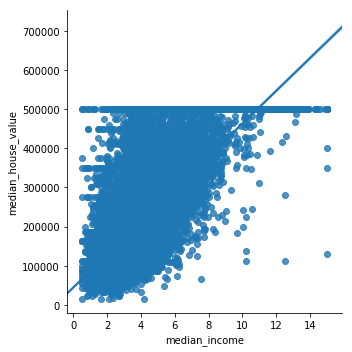

In [171]:
sns.lmplot(x='median_income',y='median_house_value', data=df)